## Problem statement

We are tasked by Netflix to gain some insights into their Original film data. Netflix wants to know what are the ways to improve IMDB Score and where their focus should be on to create better films. 

In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Netflix Original Films & IMDB Scores/NetflixOriginals.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [4]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [5]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

The column Dtypes are right for the categories. There are 4 qualitative columns and 2 quantitative columns. The runtime is in minutes.

There appears to be no missing data. There is a show with 4 minute run time when the average run time is 93mins and std of 28mins. It might be an outlier, we should check if it is a legitimate show. 

In [89]:
df.sort_values(by='Runtime')

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Month,Year
40,Sol Levante,Anime / Short,2020-04-02,4,4.7,English,4,2020
417,Cops and Robbers,Animation / Short,2020-12-28,7,6.9,English,12,2020
325,Canvas,Animation / Short,2020-12-11,9,6.5,English,12,2020
66,American Factory: A Conversation with the Obamas,Aftershow / Interview,2019-08-21,10,5.2,English,8,2019
498,Zion,Documentary,2018-08-10,11,7.2,English,8,2018
...,...,...,...,...,...,...,...,...
247,Citation,Drama,2020-11-06,151,6.2,English,11,2020
284,The Forest of Love,Drama,2019-10-11,151,6.3,Japanese,10,2019
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,12,2018
328,Da 5 Bloods,War drama,2020-06-12,155,6.5,English,6,2020


Seems like there are short films that are legitimate. There is even a genre 'Short' for it. 

In [91]:
# new column to classify films with English language or not
df['Is_english'] = df['Language'].map(lambda x: 1 if 'English' in x else 0)

In [9]:
# change Premiere column to date_time format for easier exploration
df.Premiere = pd.to_datetime(df.Premiere)

In [74]:
df['Month'] = df.Premiere.dt.month

In [75]:
df['Year'] = df.Premiere.dt.year

In [93]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Month,Year,Is_english
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,8,2019,1
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,8,2020,0
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,12,2019,0
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,1,2018,1
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,10,2020,0


## Data Visualizations

### Correlation between features

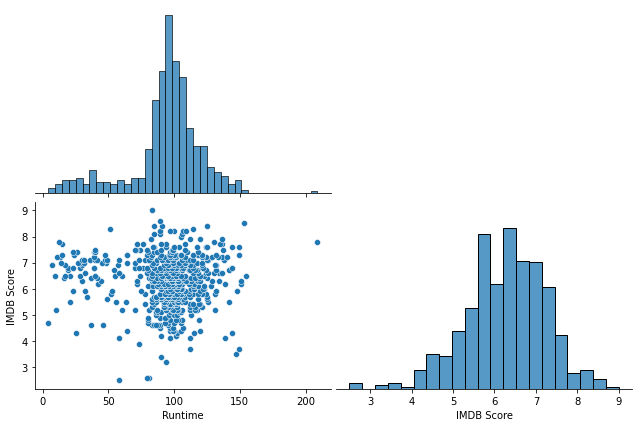

In [80]:
sns.pairplot(df[['Runtime', 'IMDB Score']], height=3, aspect=1.5, corner=True);

There is not much correlation between Runtime and IMDB Score. However it is notable that Runtime around 100minutes are the most popular and the majority of the scores are between 5 and 8. There are very little films with high ratings 8 and above and low ratings 5 and below. 

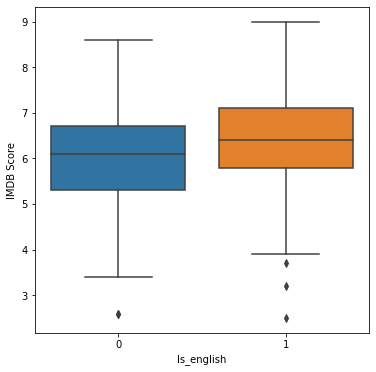

In [98]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='Is_english', y='IMDB Score');

Seems like English language films have a slight advantage over films that are not in English. The higher average score is only about 0.3 difference. The lower and upper range of English language films are also better than non-English language films. 

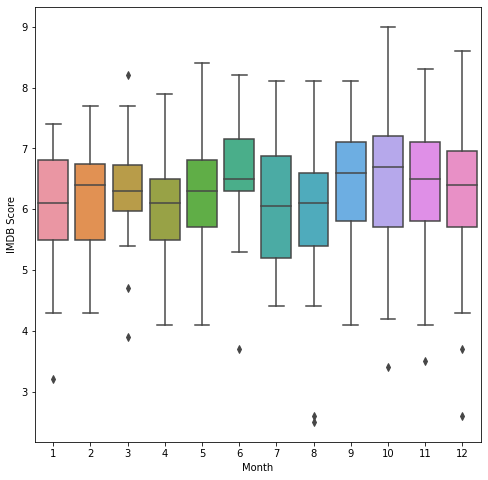

In [99]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='Month', y='IMDB Score');

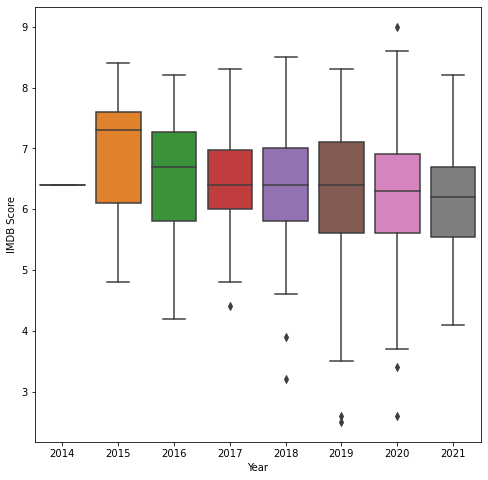

In [100]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='Year', y='IMDB Score');

The boxplot above shows that there is not much of a difference when the film is premiered. The months with the slightly higher median score are June, Sep and Oct. With June having the highest lower range of 5 and above.

The year 2015 can be seen to have the highest median IMDB score of 7 and above. While the rest of the years hover between the range of 6 to 7.

### Average score of film Genres

In [34]:
df_genre_scores = df.groupby(by='Genre').agg(count=('Genre','size'), avg_runtime=('Runtime', 'mean'), avg_score=('IMDB Score', 'mean')).sort_values(by='avg_score', ascending=False)

In [49]:
df_genre_scores_mod = df_genre_scores.loc[df_genre_scores['count'] != 1]
df_genre_scores_mod

,count,avg_runtime,avg_score
Genre,,,
Concert Film,6,98.666667,7.633333
Making-of,2,42.500000,7.450000
One-man show,3,98.666667,7.133333
Animation / Short,4,10.750000,7.125000
War drama,2,145.500000,7.100000
Documentary,159,78.962264,6.936478
Aftershow / Interview,6,23.666667,6.750000
War,2,110.500000,6.750000
Crime drama,11,118.181818,6.745455


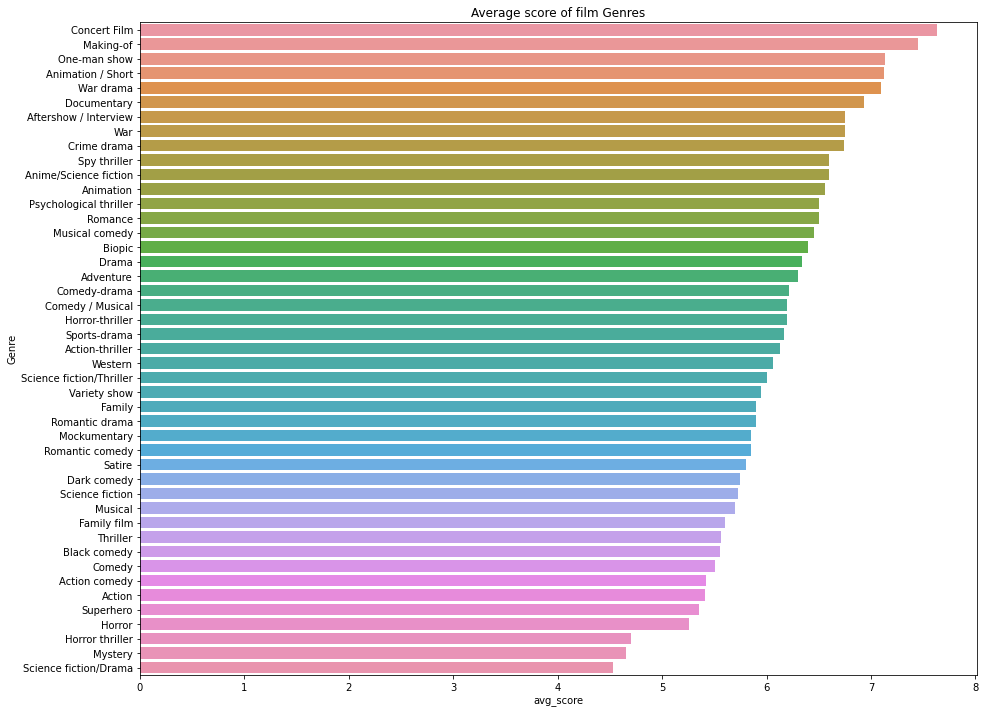

In [61]:
plt.figure(figsize=(15,12))
sns.barplot(data=df_genre_scores_mod, y=df_genre_scores_mod.index, x='avg_score')
plt.title("Average score of film Genres");

Here we have the average score of the different Genres of film. I removed Genres with 1 count so as to eliminate successful one-off films. 

Top 5 highest scoring Genres are Concert Film, Making-of, One-man show, Animation / Short and War drama.

Bottom 5 are Superhero, Horror, Horror thriller, Mystery, Science fiction/Drama.

## Conclusion

In conclusion, some of the ways to get a higher IMDB score is to include English language into the film, premier the film in June and create a film with a genre in the top 5 (Concert Film, Making-of, One-man show, Animation / Short and War drama).

Although there might not be significant ways to improve the IMDB score, films created this way is more likely to achieve a higher average score. 

Further improvements:
- Include more features such as Film budget, Film viewership and cast. 
- Create Tableau dashboard to check out scores of film in different genres, year, month etc.

In [112]:
df.to_csv("Netflix Original Films & IMDB Scores/NetflixOriginals_mod.csv")